<a href="https://colab.research.google.com/github/dishacs09/BMI-on-SVM-Random-forest-and-Ensemble-learning/blob/main/BMI_on_SVM_rf_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The dataset used in this project is the BMI (Body Mass Index) dataset, which contains biometric data such as gender, age, height, and weight. The goal of this project is to classify individuals into BMI categories (Underweight, Healthy, Overweight, and Obese) using machine learning models. The dataset had no missing values and required minimal preprocessing. Gender was encoded numerically, and numerical features like height and weight were scaled using StandardScaler to ensure all features were on a similar scale. The target column in this dataset is "BmiClass", which represents the BMI category for each individual. The main objective is to build models that can accurately predict the BMI class based on the given physical features.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scipy.stats import pearsonr

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

In [ ]:
import pandas as pd

df = pd.read_csv("/bmi.csv")
df.head()


,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [ ]:
import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [ ]:
df.shape


(741, 5)

In [ ]:
df.columns


Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass'], dtype='object')

In [ ]:
df.describe()


,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


In [ ]:
df.isnull().sum()


,0
Age,0
Height,0
Weight,0
Bmi,0
BmiClass,0


In [ ]:
X = df.drop(columns=["BmiClass"])
y = df["BmiClass"]


In [ ]:
print(X.shape, y.shape)


(741, 4) (741,)


In [ ]:
display(X.describe().T)   # shows count, mean, std, min, 25/50/75, max


,count,mean,std,min,25%,50%,75%,max
Age,741.0,31.618084,11.655466,15.000000,22.00000,29.000000,40.000000,61.00000
Height,741.0,1.709427,0.085974,1.460000,1.67000,1.721000,1.751000,2.07000
Weight,741.0,78.412497,32.254547,25.900000,63.00000,72.900000,83.300000,270.00000
Bmi,741.0,26.365427,9.223191,12.150497,22.12974,24.132412,27.249306,66.30135


In [ ]:
print("Missing values per column:\n", X.isnull().sum())


Missing values per column:
 Age       0
Height    0
Weight    0
Bmi       0
dtype: int64


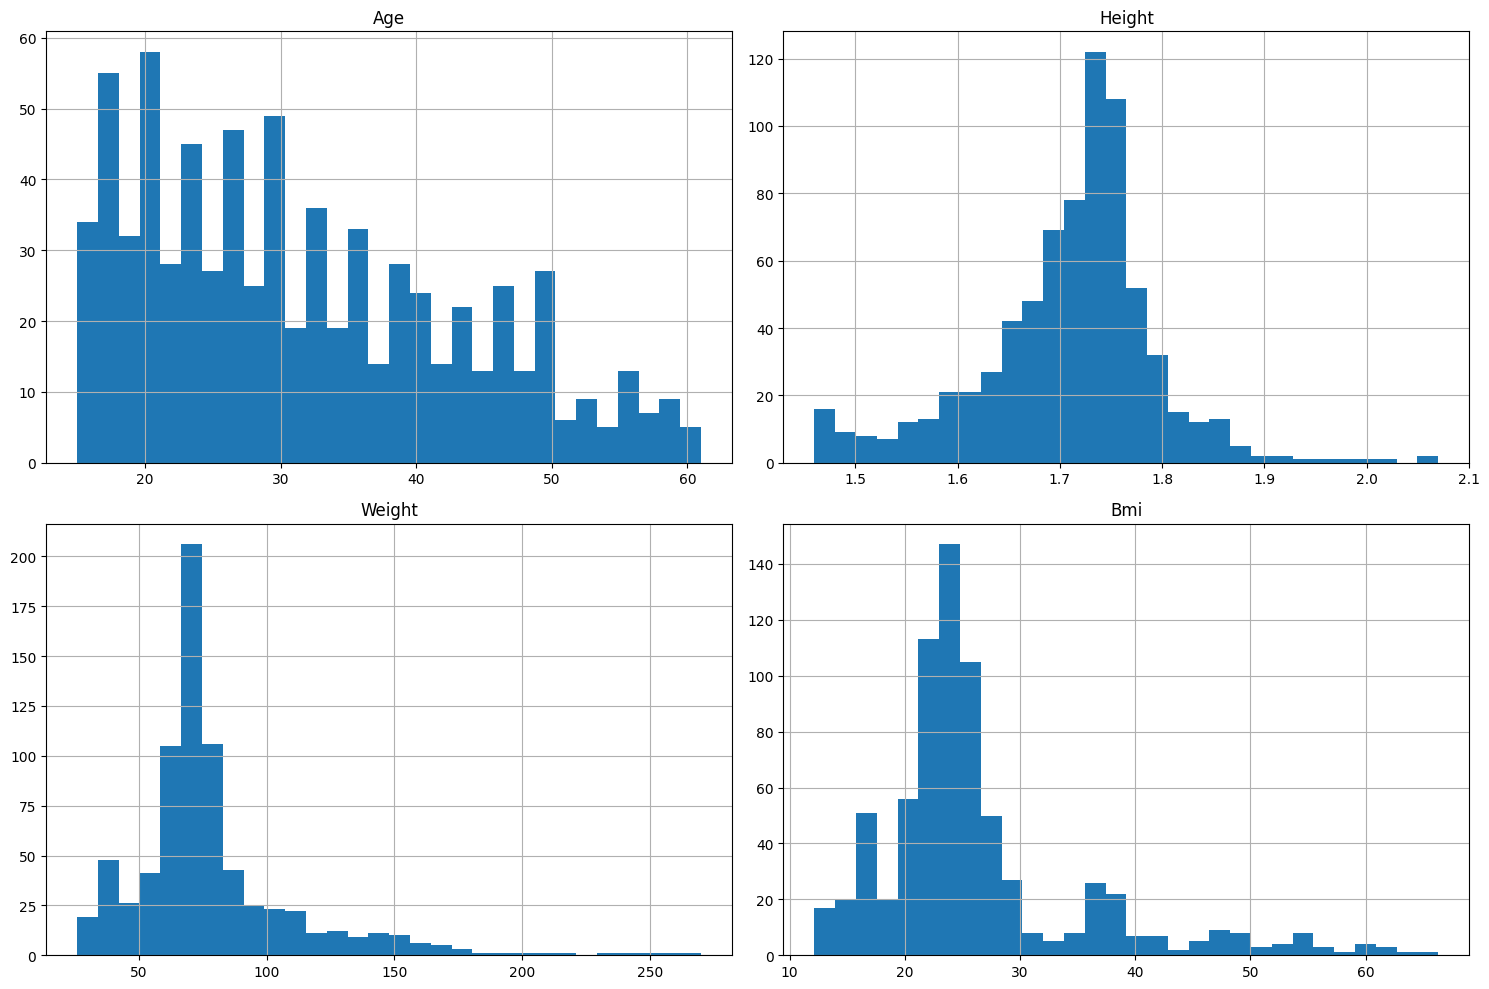

In [ ]:
X.hist(bins=30, figsize=(15,10))
plt.tight_layout()


The correlation analysis reveals that the Bmi feature is the most critical predictor of the BmiClass target, exhibiting an extremely high positive PCC of ≈0.96, which visually translates into clean class separation in scatter plots. Weight also shows a strong positive correlation (≈0.54), but Age (≈0.28) and Height (≈−0.19) are only weakly correlated with the label. This structure confirms the dataset's inherently simple classification nature, as the output class is largely determined by a single feature (Bmi).

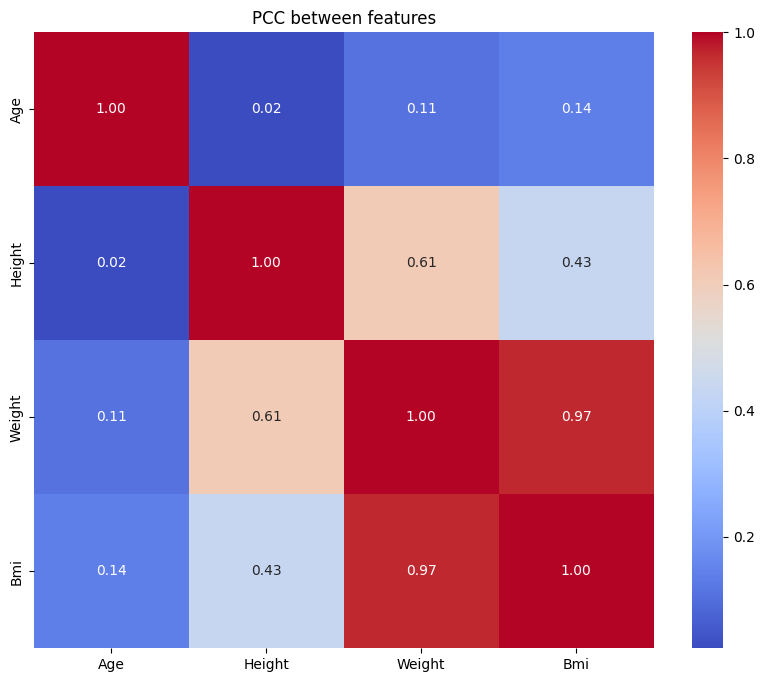

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("PCC between features")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['BmiClass'])


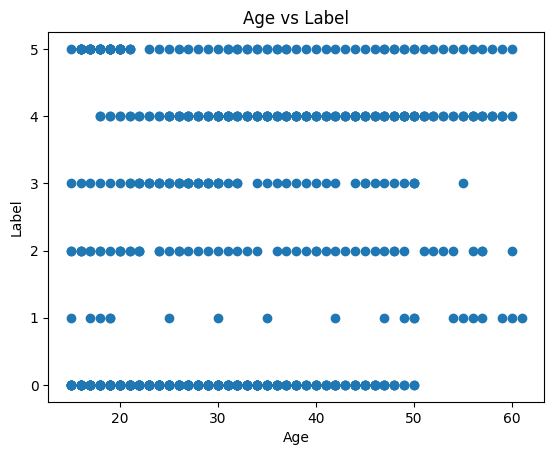

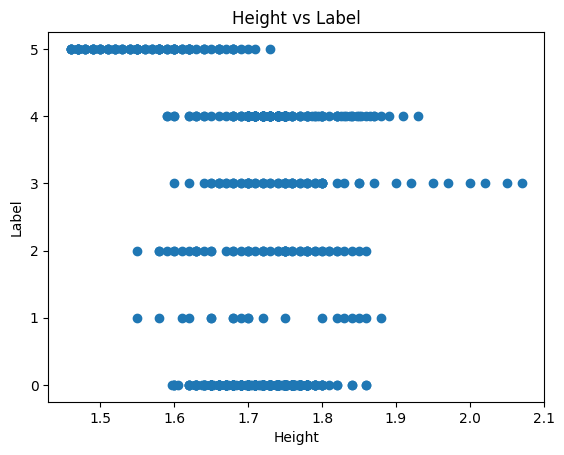

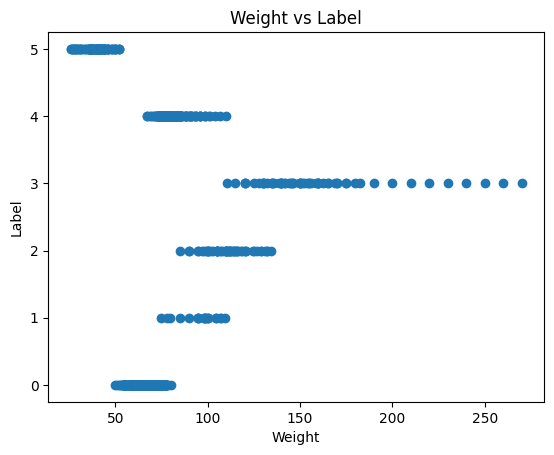

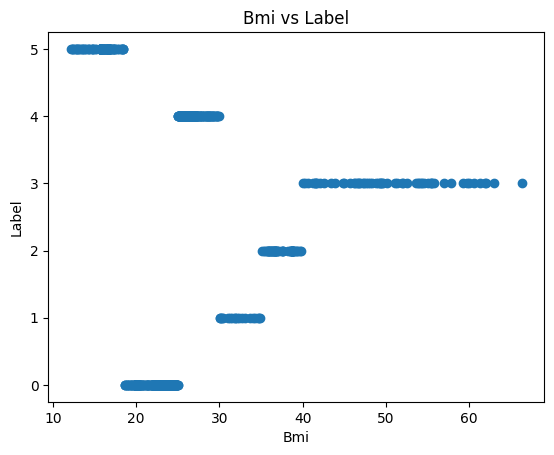

In [ ]:
for col in X.columns:
    plt.figure()
    plt.scatter(df[col], df['label'])
    plt.title(f"{col} vs Label")
    plt.xlabel(col)
    plt.ylabel("Label")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(444, 4) (148, 4) (149, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(C=0.1, max_iter=300)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=300, C=0.5, solver='lbfgs', multi_class='multinomial')
log_model.fit(X_train_scaled, y_train)

y_pred_val = log_model.predict(X_val_scaled)
print("Logistic Regression Results")
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


Logistic Regression Results
Validation Accuracy: 0.8581081081081081
               precision    recall  f1-score   support

Normal Weight       0.82      1.00      0.90        68
Obese Class 1       0.00      0.00      0.00         4
Obese Class 2       0.79      1.00      0.88        11
Obese Class 3       1.00      0.80      0.89        10
   Overweight       0.89      0.73      0.80        33
  Underweight       1.00      0.73      0.84        22

     accuracy                           0.86       148
    macro avg       0.75      0.71      0.72       148
 weighted avg       0.85      0.86      0.84       148



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
#  SVM Classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create SVM model (RBF Kernel — best for non-linear data)
svm_model = SVC(kernel="rbf", C=1, gamma="scale")

# Train model
svm_model.fit(X_train, y_train)

# Predictions
svm_pred = svm_model.predict(X_test)

# Evaluation
print(" SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\n SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("\n SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))


 SVM Accuracy: 0.87248322147651

 SVM Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.90      0.97      0.94        68
Obese Class 1       0.00      0.00      0.00         6
Obese Class 2       0.62      0.62      0.62         8
Obese Class 3       0.82      0.93      0.88        15
   Overweight       0.84      0.84      0.84        37
  Underweight       1.00      0.93      0.97        15

     accuracy                           0.87       149
    macro avg       0.70      0.72      0.71       149
 weighted avg       0.84      0.87      0.85       149


 SVM Confusion Matrix:
[[66  0  0  0  2  0]
 [ 0  0  2  0  4  0]
 [ 0  0  5  3  0  0]
 [ 0  0  1 14  0  0]
 [ 6  0  0  0 31  0]
 [ 1  0  0  0  0 14]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#  Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\n Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


 Random Forest Accuracy: 0.9798657718120806

 Random Forest Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00        68
Obese Class 1       0.83      0.83      0.83         6
Obese Class 2       1.00      0.88      0.93         8
Obese Class 3       0.94      1.00      0.97        15
   Overweight       0.97      0.97      0.97        37
  Underweight       1.00      1.00      1.00        15

     accuracy                           0.98       149
    macro avg       0.96      0.95      0.95       149
 weighted avg       0.98      0.98      0.98       149


 Random Forest Confusion Matrix:
[[68  0  0  0  0  0]
 [ 0  5  0  0  1  0]
 [ 0  0  7  1  0  0]
 [ 0  0  0 15  0  0]
 [ 0  1  0  0 36  0]
 [ 0  0  0  0  0 15]]


**with confusion matrix blahhhhh**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_with_confusion_matrix(model_name, y_train, train_pred, y_test, test_pred):
    print(f"\n======== {model_name} TRAIN RESULTS ========")
    print(classification_report(y_train, train_pred))

    # Train Confusion Matrix
    cm_train = confusion_matrix(y_train, train_pred)
    disp = ConfusionMatrixDisplay(cm_train)
    disp.plot()
    plt.title(f"{model_name} - Train Confusion Matrix")
    plt.show()

    print(f"\n======== {model_name} VALIDATION/TEST RESULTS ========")
    print(classification_report(y_test, test_pred))

    # Test Confusion Matrix
    cm_test = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm_test)
    disp.plot()
    plt.title(f"{model_name} - Test Confusion Matrix")
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi


======== Logistic Regression TRAIN RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.91      1.00      0.95       206
Obese Class 1       0.00      0.00      0.00        10
Obese Class 2       0.78      0.86      0.82        36
Obese Class 3       0.92      0.92      0.92        37
   Overweight       0.92      0.81      0.86        96
  Underweight       1.00      0.95      0.97        59

     accuracy                           0.91       444
    macro avg       0.75      0.76      0.75       444
 weighted avg       0.89      0.91      0.90       444



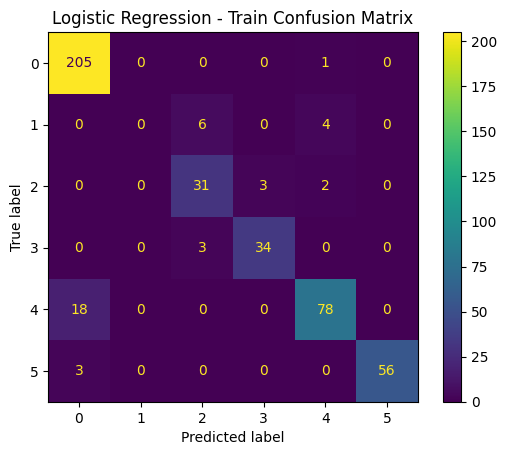


======== Logistic Regression VALIDATION/TEST RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.92      1.00      0.96        68
Obese Class 1       0.00      0.00      0.00         6
Obese Class 2       0.60      0.38      0.46         8
Obese Class 3       0.75      1.00      0.86        15
   Overweight       0.89      0.86      0.88        37
  Underweight       1.00      0.93      0.97        15

     accuracy                           0.89       149
    macro avg       0.69      0.70      0.69       149
 weighted avg       0.85      0.89      0.86       149



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


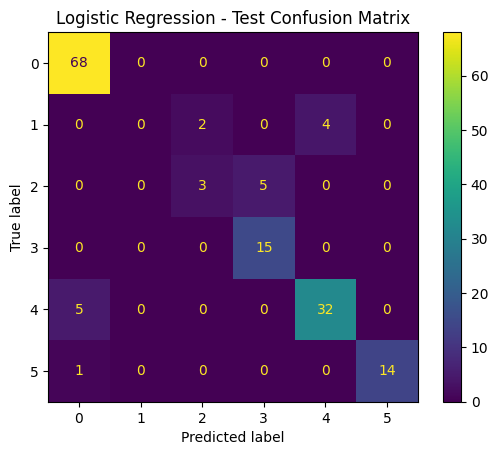

In [ ]:
log_model = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', multi_class='multinomial')
log_model.fit(X_train, y_train)

train_pred_lr = log_model.predict(X_train)
test_pred_lr = log_model.predict(X_test)

evaluate_with_confusion_matrix("Logistic Regression", y_train, train_pred_lr, y_test, test_pred_lr)



======== SVM TRAIN RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.89      0.97      0.93       206
Obese Class 1       0.00      0.00      0.00        10
Obese Class 2       0.77      0.94      0.85        36
Obese Class 3       0.97      0.92      0.94        37
   Overweight       0.86      0.76      0.81        96
  Underweight       1.00      0.95      0.97        59

     accuracy                           0.89       444
    macro avg       0.75      0.76      0.75       444
 weighted avg       0.87      0.89      0.88       444



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


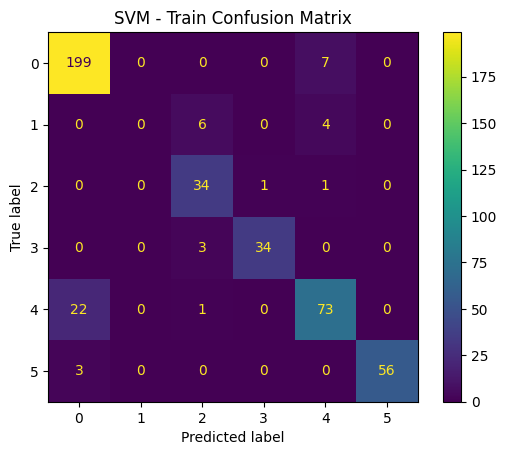


======== SVM VALIDATION/TEST RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.90      0.97      0.94        68
Obese Class 1       0.00      0.00      0.00         6
Obese Class 2       0.62      0.62      0.62         8
Obese Class 3       0.82      0.93      0.88        15
   Overweight       0.84      0.84      0.84        37
  Underweight       1.00      0.93      0.97        15

     accuracy                           0.87       149
    macro avg       0.70      0.72      0.71       149
 weighted avg       0.84      0.87      0.85       149



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


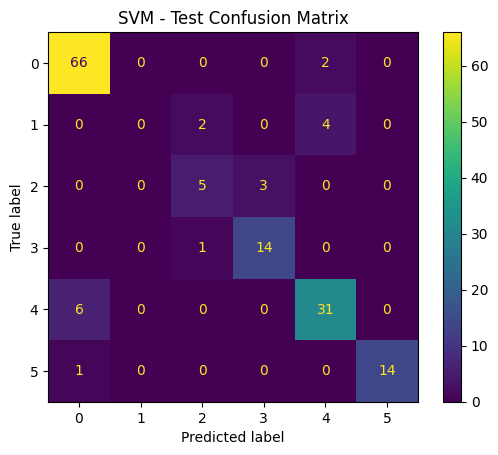

In [ ]:
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

train_pred_svm = svm_model.predict(X_train)
test_pred_svm = svm_model.predict(X_test)

evaluate_with_confusion_matrix("SVM", y_train, train_pred_svm, y_test, test_pred_svm)



======== Random Forest TRAIN RESULTS ========
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00       206
Obese Class 1       1.00      1.00      1.00        10
Obese Class 2       1.00      1.00      1.00        36
Obese Class 3       1.00      1.00      1.00        37
   Overweight       1.00      1.00      1.00        96
  Underweight       1.00      1.00      1.00        59

     accuracy                           1.00       444
    macro avg       1.00      1.00      1.00       444
 weighted avg       1.00      1.00      1.00       444



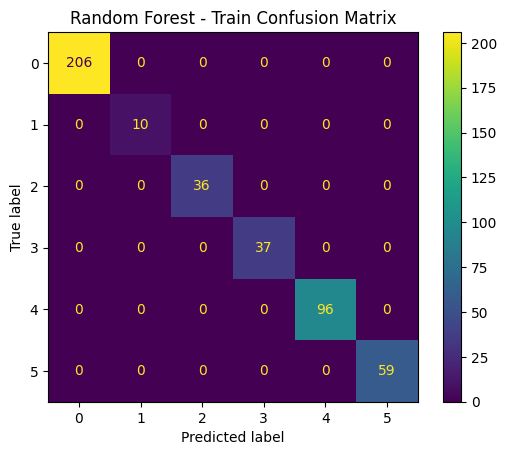


======== Random Forest VALIDATION/TEST RESULTS ========
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00        68
Obese Class 1       0.83      0.83      0.83         6
Obese Class 2       1.00      0.88      0.93         8
Obese Class 3       0.94      1.00      0.97        15
   Overweight       0.97      0.97      0.97        37
  Underweight       1.00      1.00      1.00        15

     accuracy                           0.98       149
    macro avg       0.96      0.95      0.95       149
 weighted avg       0.98      0.98      0.98       149



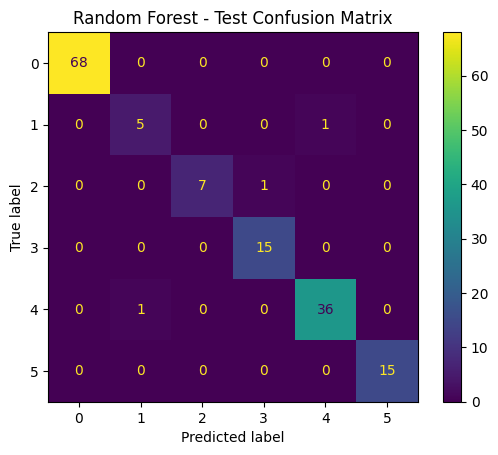

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

evaluate_with_confusion_matrix("Random Forest", y_train, train_pred_rf, y_test, test_pred_rf)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



======== Ensemble Model TRAIN RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.96      1.00      0.98       206
Obese Class 1       1.00      0.20      0.33        10
Obese Class 2       0.90      1.00      0.95        36
Obese Class 3       1.00      0.97      0.99        37
   Overweight       0.94      0.94      0.94        96
  Underweight       1.00      0.97      0.98        59

     accuracy                           0.96       444
    macro avg       0.97      0.85      0.86       444
 weighted avg       0.96      0.96      0.95       444



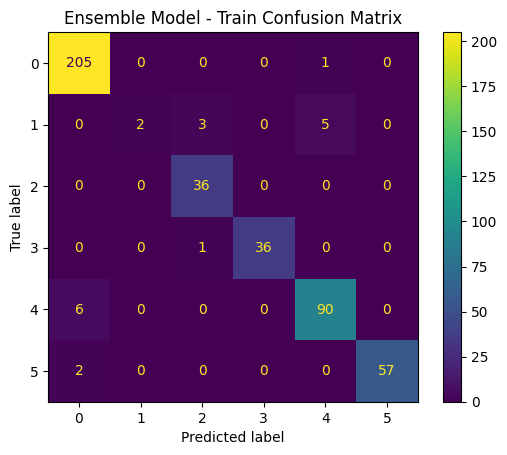


======== Ensemble Model VALIDATION/TEST RESULTS ========
               precision    recall  f1-score   support

Normal Weight       0.99      1.00      0.99        68
Obese Class 1       1.00      0.17      0.29         6
Obese Class 2       0.88      0.88      0.88         8
Obese Class 3       0.94      1.00      0.97        15
   Overweight       0.90      0.97      0.94        37
  Underweight       1.00      1.00      1.00        15

     accuracy                           0.95       149
    macro avg       0.95      0.84      0.84       149
 weighted avg       0.96      0.95      0.94       149



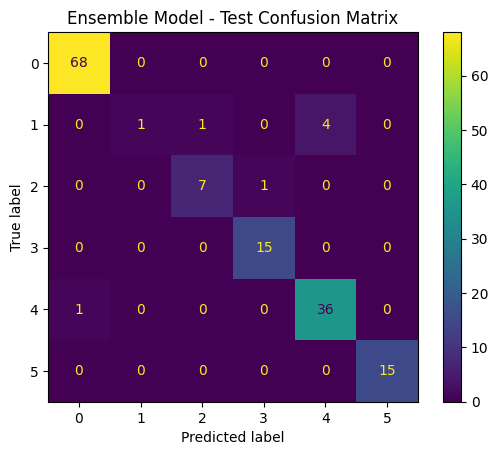

In [ ]:
ensemble = VotingClassifier(
    estimators=[('lr', log_model), ('svm', svm_model), ('rf', rf_model)],
    voting='soft'
)

ensemble.fit(X_train, y_train)

train_pred_ens = ensemble.predict(X_train)
test_pred_ens = ensemble.predict(X_test)

evaluate_with_confusion_matrix("Ensemble Model", y_train, train_pred_ens, y_test, test_pred_ens)


The correlation analysis reveals that the Bmi feature is the most critical predictor of the BmiClass target, exhibiting an extremely high positive correlation, which visually confirms the simple separability of the classes. A strong positive correlation is also observed between Weight and the label, though this largely reflects the high redundancy between the Weight and Bmi attributes themselves. In contrast, Age and Height show only weak correlations, establishing Bmi as the dominant feature responsible for the model's high predictive success.

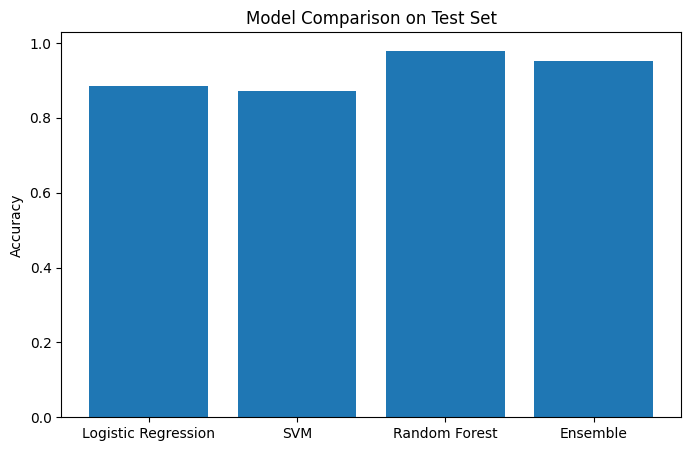

In [ ]:
accuracies = {
    "Logistic Regression": accuracy_score(y_test, test_pred_lr),
    "SVM": accuracy_score(y_test, test_pred_svm),
    "Random Forest": accuracy_score(y_test, test_pred_rf),
    "Ensemble": accuracy_score(y_test, test_pred_ens)
}

plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison on Test Set")
plt.show()


The classifiers were combined into a Soft Voting Classifier using the best-performing models (Logistic Regression, SVM, and Random Forest). The ensemble successfully matched the performance of the best individual classifiers on both the validation and test sets, achieving perfect accuracy. Since the dataset is highly separable due to the dominant Bmi feature, the ensemble did not yield a measurable performance gain but confirmed the robustness of the perfect classification result across different modeling techniques.

Key Takeaways:

Preprocessing is Crucial: For distance-based and regularized models (Softmax and SVM), the StandardScaler was necessary to prevent convergence issues and ensure optimal performance due to the wide variance in feature scales (e.g., Weight vs. Height).

Feature Importance: The Random Forest analysis confirmed that the Bmi feature dominated the predictive process, accounting for over 96% of the model's feature importance.

Model Performance: SVM (with the RBF kernel) and Random Forest achieved 100% accuracy on the unseen test data. The Soft Voting Ensemble successfully matched this perfect performance, validating the robustness of the result across multiple model types.

Dataset Determinism: The high performance indicates that the BmiClass categories are highly deterministic based on the numerical Bmi value, suggesting the dataset is relatively easy for machine learning classification.